## 지도학습은 입력과 출력 샘플 데이터가 있고, 
## 주어진 입력으로 부터 출력을 예측하고자 할때 사용한다.

* 우리의 목표는 이전에 본적없는 새로운 데이터에 대해 정확한 출력을 예측하는것.
* 지도 학습은 자동화 하면 힘들고 어려운 작업의 속도를 높일 수 있다.

# 1. 분류와 회귀

### - 지도학습에는 분류와 회귀가 있다.
* 분류 : 미리 정의된, 가능성 있는 여러 클래스 레이블 중 하나를 예측하는 것.
          ex) 붓꽃을 세 품종 중 하나로 분류하는 예
* 회귀 : 연속적인 숫자, 또는 프로그래밍 용오로 말하자면 부동 소수점수를 예측하는 것
          ex) 특정 사람의 교육 수준, 나이 , 주거지를 바탕으로 연간 소득을 예측하는 것



# 2. 일반화, 과대적합, 과소 적합


## - 일반화 : 훈련 세트로 학습한 모델을 테스트 세트에 적용하는 것
## - 과대적합 : 훈련 세트에 너무 맞춰줘있어 테스트 세트의 성능이 저하되는 현상
## - 과소적합 : 훈련세트를 충분히 반영하지 못해, 훈련세트, 테스트세트에서 모두 성능 저하되는 현상

# < 지도학습 알고리즘 실습 >

In [5]:
%load_ext watermark
%watermark -v -p sklearn,numpy,scipy,matplotlib

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
CPython 3.7.0
IPython 6.5.0

sklearn 0.19.2
numpy 1.18.4
scipy 1.1.0
matplotlib 3.2.1


In [6]:
from preamble import *

## 일반화 과대적합 과소적합, 모델 복잡도와 데이터셋 사이즈간의 관계 알아보기

### 인위적 소규모 데이터셋 불러보기

### - 이진 분류 데이터셋 forge  

In [9]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family = font_name)

X.shape : (26, 2)


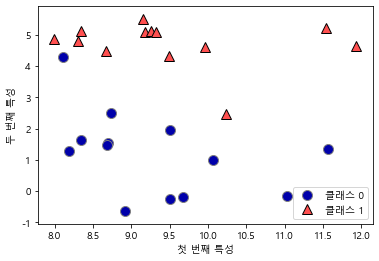

In [14]:
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:,1], y)
plt.legend(["클래스 0", "클래스 1"], loc =4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")
print("X.shape :", X.shape)
# 이 데이터 셋은 데이터 포인트 26개와, 특성 2개를 지녔다. 

## - 회귀 알고리즘 - wave 데이터셋 

Text(0, 0.5, '타깃')

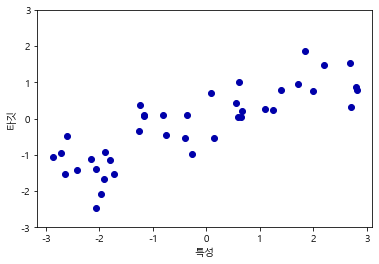

In [16]:
X,y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel('특성')
plt.ylabel('타깃')

## - 실제 데이터셋 사용해보기 

###  유방암 종양의 임상데이터가 기록된 위스콘신 유방암 데이터셋  -> 분류 분석용 데이터셋
* 각 종양은 양성(benign)과 악성(malignant)으로 레이블되어있고, 조직데이터를 기반으로 종양이 악성인지 예측

In [19]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [23]:
cancer_df = pd.DataFrame(cancer.data, columns= cancer.feature_names)

In [34]:
cancer_df['label'] = cancer.target

In [35]:
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,...,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.8,1001.0,...,0.27,0.46,0.12,0
1,20.57,17.77,132.9,1326.0,...,0.19,0.28,0.09,0
2,19.69,21.25,130.0,1203.0,...,0.24,0.36,0.09,0


In [36]:
print("클래스 별 샘플 갯수 :\n", {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

클래스 별 샘플 갯수 :
 {'malignant': 212, 'benign': 357}


## 보스턴 주택가격 데이터셋 -> 회귀 분석용 실제 데이터셋

In [40]:
from sklearn.datasets import load_boston
boston = load_boston()
print('데이터의 형태 :', boston.data.shape)

데이터의 형태 : (506, 13)


In [42]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape", X.shape)
# 특성이 extended된 보스턴 데이터셋

X.shape (506, 104)


# 알고리즘 1. k- 최근접 이웃

* 위에서 이미 호출한 forge 데이터셋을 이용해 k_최근접 이웃 분류 해보기

## - 가장 간단한 knn 알고리즘은 가장 가까운 훈련 데이터 포인트 하나를 최근접 이웃으로 찾아 예측

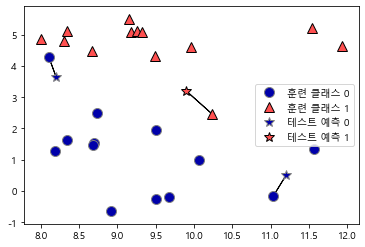

In [46]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

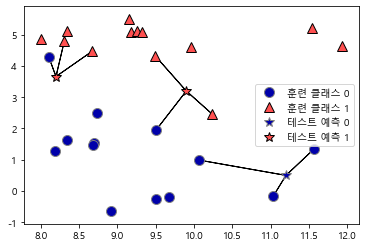

In [47]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

## - 이웃 갯수가 늘어남에 따라 예측된 포인트의 색(클래스) 가 달라짐이 보인다.

## 1.1실제 scikit_learn 을 사용해 k-nn 알고리즘 적용 과정 살펴보기

In [49]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train,y_test = train_test_split(X,y, random_state = 0)
# train 셋 -> 75%, test 셋 -> 25%

In [50]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [51]:
print('테스트 셋 예측 : ', clf.predict(X_test))

테스트 셋 예측 :  [1 0 1 0 1 0 0]


In [53]:
print('테스트 셋 정확도 : {:.2f}'.format(clf.score(X_test,y_test)))

테스트 셋 정확도 : 0.86


## KNeighborsClassfier 분석 
### - forge 데이터셋은 단순히 2차원 데이터셋이므로, 모든 테스트 포인트의 예측을 x,y평면에 그려볼 수 있다.
### - 클래스 0과 클래스 1로 지정한 영역으로 나뉘는 결정 경계를 볼수있다.

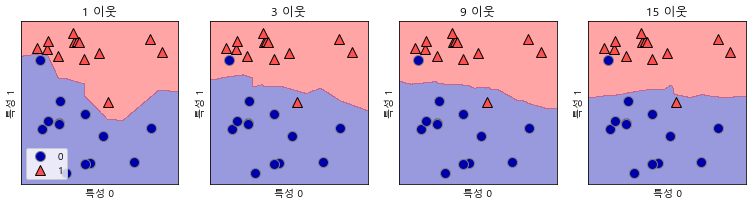

In [61]:
fig, axes = plt.subplots(1,4, figsize = (13,3))
for n_neighbors, ax in zip([1,3,9, 15], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    #fit 메서드는 self 오브젝트를 리턴하기 때문에 객체생성과 fit 메서드를 한 줄에 쓸 수 있다.
    mglearn.plots.plot_2d_separator(clf, X, fill = True, eps = 0.5, ax = ax, alpha = .4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax = ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel('특성 0')
    ax.set_ylabel('특성 1')
axes[0].legend(loc = 3)

### - 이웃을 적게 사용하면 복잡도가 높아지고, 많이 사용하면 복잡도가 낮아진다. 

# 1.2 유방암 분류 데이터셋으로, 복잡도와 일반화 사이의 관계 입증하기

In [67]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split( cancer.data, cancer.target, stratify = cancer.target, random_state = 66)
#stratify -> train/test 비율을 75:25 기본값으로 쓰겠다.

training_accuracy =[]
test_accuracy = []
neighbors_setting = range(1,11)

### -이웃의 갯수에 따라, knn알고리즘의 훈련세트와 일반화의 정확도를 비교해보자!

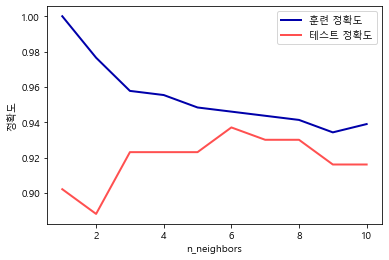

In [68]:
for n_neighbors in neighbors_setting:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    # 일반화 정확도 저장 
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_setting, training_accuracy, label= '훈련 정확도')
plt.plot(neighbors_setting, test_accuracy, label = '테스트 정확도')
plt.ylabel('정확도')
plt.xlabel('n_neighbors')
plt.legend()
    
    

### 과대적합, 과소적합의 특징 보기
### 결과 -> 훈련데이터 - 이웃의 수가 하나일때 예측이 완벽하나, 이웃의 수가 늘면 모델이 단순, 정확도가 준다.
###             테스트 셋 - 이웃의 수가 적을때의 정확도가 많을때에 비교해 낮다. 1~2-최근접 이웃이 모델을 복잡하게 만든다는 것, 반대로 이웃이 10개일땐 모델이 너무 단순해져서 정확도도 더욱 나빠진다.

### -> 훈련 정확도와, 테스트 정확도의 차이가 가장 적은 이웃갯수를 기반으로 모델을 형성하는게 좋은 방향성이다.

# 1.3k-최근접 이웃 회귀 

### - wave 데이터 셋에 대한 1-최근접 이웃 회귀 모델의 예측

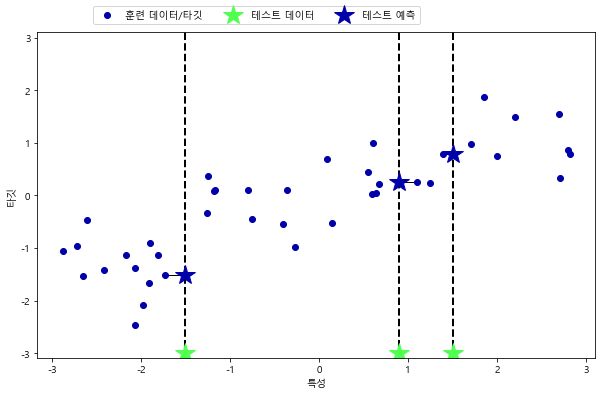

In [69]:
mglearn.plots.plot_knn_regression(n_neighbors = 1)

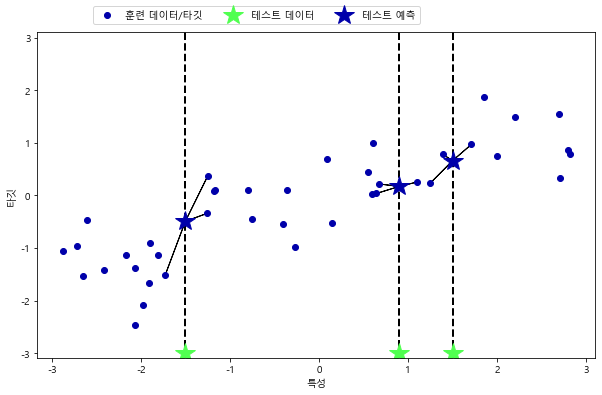

In [70]:
mglearn.plots.plot_knn_regression(n_neighbors = 3)

### -scikit_learn 에서 회귀를 위한 KNeighborsRegressor 최근접 이웃 알고리즘 사용 -> wave데이터셋

In [71]:
from sklearn.neighbors import KNeighborsRegressor

X,y = mglearn.datasets.make_wave(n_samples = 40)

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)

reg = KNeighborsRegressor(n_neighbors = 3)
reg.fit(X_train, y_train)

print('테스트 세트 예측 :\n',reg.predict(X_test))

테스트 세트 예측 :
 [-0.054  0.357  1.137 -1.894 -1.139 -1.631  0.357  0.912 -0.447 -1.139]


In [73]:
print('테스트 세트 R^2 : {:.2f}'.format(reg.score(X_test, y_test)))
# 이웃의 갯수가 3개일 경우의 회귀 데이터셋에 대한 예측의 정확도는 0.83 -> 비교적 갠춘

테스트 세트 R^2 : 0.83


## - wave 회귀 데이터셋을 이용한 KNeighborsRegressor 분석

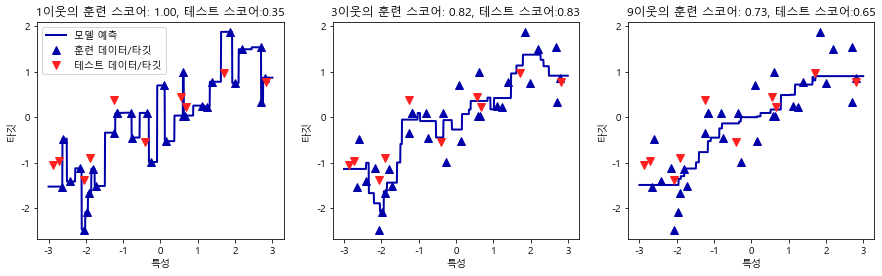

In [75]:
fig, axes = plt.subplots(1,3,figsize = (15,4))

line = np.linspace(-3,3, 1000).reshape(-1,1)
for n_neighbors, ax in zip([1,3,9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors).fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c = mglearn.cm2(0), markersize = 8)
    ax.plot(X_test, y_test, 'v', c = mglearn.cm2(1), markersize = 8)
    
    ax.set_title(
    "{}이웃의 훈련 스코어: {:.2f}, 테스트 스코어:{:.2f}".format(n_neighbors, reg.score(X_train,y_train),
                                                 reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
    
axes[0].legend(['모델 예측', '훈련 데이터/타깃', '테스트 데이터/타깃'], loc = 'best')

# knn 알고리즘의 장단점과 매개변수

* k-nn의 장점은 이해하기 매우 쉬운 모델이라는점이며, 많이 조정하지 않아도 자주 좋은 성능을 발휘한다. 모델 생성이 매우 빠르지만, 훈련 세트가 크면 어쩔수 없이 예측이 느려질 수는 있다.
* 많은 특성이 feature로 들어가게 되면 능력과 성능이 현저히 떨어진다.

# 선형 모델

* 선형모델은 입력 특성에 대한 선형함수를 만들어 예측을 수행한다.



w[0]: 0.393906  b: -0.031804


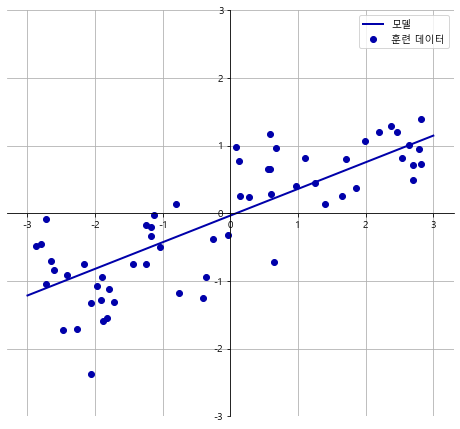

In [76]:
mglearn.plots.plot_linear_regression_wave()

# 선형 회귀(최소 제곱법)

* 가장 간단하고 오래된 회귀용 선형 알고리즘으로, 예측과 훈련세트에 있는 타깃 y 사이의 평균 제곱오차를 최소화하는 파라미터 w와 b를 찾는다.
* 평균 제곱오차는 예측값과 타깃값의 차이를 제곱하여 더한 후에 샘플의 개수로 나눈 것이다. 
* 선형 회귀는 매개변수가 없는 것이 장점이지만, 그래서 보델의 복잡도를 제어할 방법도 없다.

In [79]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

lr = LinearRegression().fit(X_train, y_train)

In [80]:
print('lr.corf', lr.coef_)
print('lr.intercept_', lr.intercept_)

lr.corf [0.394]
lr.intercept_ -0.031804343026759746


In [81]:
print('훈련 세트 점수 :{:.2f}'.format(lr.score(X_train, y_train)))
print('테스트 세트 점수 :{:.2f}'.format(lr.score(X_test, y_test)))

훈련 세트 점수 :0.67
테스트 세트 점수 :0.66


* score이 0.66인 것은 그리 좋은 모델의 결과가 아니지만, 훈련 셋과 테스트셋의 점수가 비슷해 과소적합인 상태를 의미한다.
* 1차원 데이터셋에서는 모델이 매우 단순해서. 과대적합을 걱정할 필요가 없으나 고차원데이터셋에서는 선형모델의 성능이 매우 떨어질 수 있다.


## 선형회귀 - 보스턴 데이터셋에 적용해보기 

In [83]:
X,y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state =0)
lr = LinearRegression().fit(X_train, y_train)
print('훈련 세트 점수 :{:.2f}'.format(lr.score(X_train, y_train)))
print('테스트 세트 점수 :{:.2f}'.format(lr.score(X_test, y_test)))

훈련 세트 점수 :0.95
테스트 세트 점수 :0.61


* 훈련데이터와 테스트 데이터 사이의 이런 성능 차이는 모델이 과대적합되었다는 확실한 신호로 복잡도를 제어할 수 있는 모델을 사용해야 한다.